In [6]:
import pandas as pd
dfRaw = pd.read_csv('imdb_top_1000.csv')

In [14]:
print("IMDB Dataset:\n")
print(dfRaw.head())
print("IMDB DataFrame Columns:\n")
print(dfRaw.columns)
print("IMDB DataFrame Statistics:\n")
print(dfRaw.describe())

IMDB Dataset:

                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

          

In [15]:
#Getting rid of redundant columns
dfRaw = dfRaw.drop(columns=['Poster_Link', 'Overview'])
dfRaw.dtypes

Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [16]:
#Converting dataypes of certain columns for easy use
dfRaw['Runtime'] = dfRaw['Runtime'].str.split(' ').str.get(0)
dfRaw['Runtime'] = dfRaw['Runtime'].astype(int)

dfRaw = dfRaw[dfRaw['Released_Year'].str.isnumeric()]
dfRaw['Released_Year'] = dfRaw['Released_Year'].astype(int)

dfRaw.dtypes

Series_Title      object
Released_Year      int32
Certificate       object
Runtime            int32
Genre             object
IMDB_Rating      float64
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [17]:
#renaming columns for better analysis
df = dfRaw.rename(columns={'Series_Title':'name', 'Released_Year':'release_y', 'Certificate':'certificate', 'Runtime':'run_time', 'Genre':'genre',
       'IMDB_Rating':'imdb_rat', 'Meta_score':'meta_sco', 'Director':'director', 'Star1':'star_1', 'Star2':'star_2', 'Star3':'star_3',
       'Star4':'star_4', 'No_of_Votes':'num_votes', 'Gross':'gross'})
df.columns

Index(['name', 'release_y', 'certificate', 'run_time', 'genre', 'imdb_rat',
       'meta_sco', 'director', 'star_1', 'star_2', 'star_3', 'star_4',
       'num_votes', 'gross'],
      dtype='object')

In [18]:
#Finding missing values
df.isna().sum()

name             0
release_y        0
certificate    101
run_time         0
genre            0
imdb_rat         0
meta_sco       157
director         0
star_1           0
star_2           0
star_3           0
star_4           0
num_votes        0
gross          169
dtype: int64

In [19]:
#The column 'genre' contains up to three genre names
#We will split this column for better use
df[['genre_1','genre_2','genre_3']] = df['genre'].str.split(pat=',',expand=True)
df.columns

Index(['name', 'release_y', 'certificate', 'run_time', 'genre', 'imdb_rat',
       'meta_sco', 'director', 'star_1', 'star_2', 'star_3', 'star_4',
       'num_votes', 'gross', 'genre_1', 'genre_2', 'genre_3'],
      dtype='object')

In [21]:
import numpy as np
import scipy as sc
import matplotlib.pylab as plt
import seaborn as sea

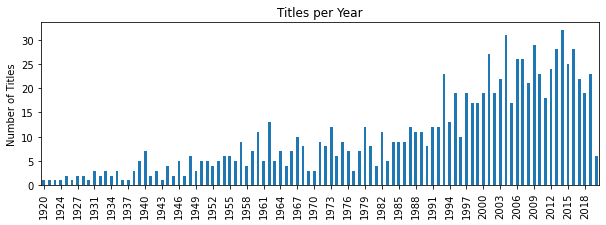

In [34]:
#Release Year:
year_plt = df['release_y'].value_counts().sort_index().plot(kind='bar', title='Titles per Year')
year_plt.set_ylabel('Number of Titles')
plt.locator_params(axis='x', nbins=40)
plt.show()

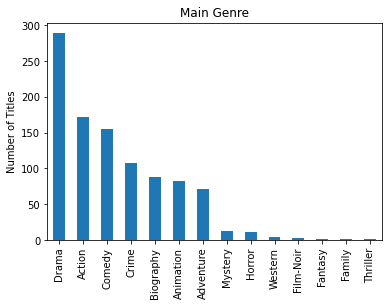

In [23]:
#We assume that the first entry in the genre row is the main genre of the repective title
genr_plt = df['genre_1'].value_counts().plot(kind='bar', title='Main Genre')
genr_plt.set_ylabel('Number of Titles')
plt.show()

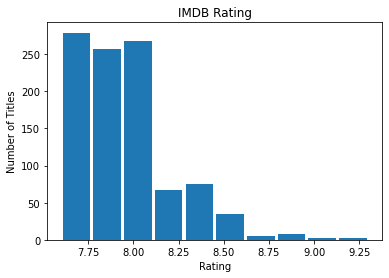

In [24]:
#IMDB Rating
imdb_plt = df['imdb_rat'].plot(kind='hist', bins=10, rwidth=0.9, title='IMDB Rating')
imdb_plt.set_ylabel('Number of Titles')
imdb_plt.set_xlabel('Rating')
plt.show()

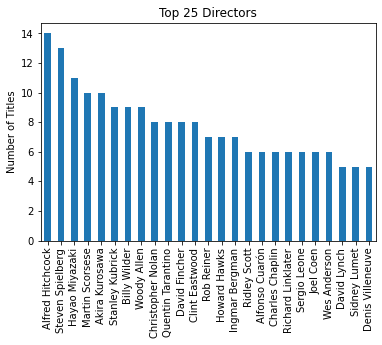

In [25]:
#Top 25 directors 
#Directors with maximum movies
dir_plt = df['director'].value_counts().head(25).plot(kind='bar', title='Top 25 Directors')
dir_plt.set_ylabel('Number of Titles')
plt.rcParams["figure.figsize"] = (9,3)
plt.show()

In [26]:
#To be able to analyse the distribution of income, we have to drop titles with no information on income and convert 
#the data type of the 'gross' column to integer
df_noNA_gross = df[~df['gross'].isna()].reset_index(drop=True)
df_noNA_gross['gross']=df_noNA_gross['gross'].str.replace(',','')
df_noNA_gross = df_noNA_gross[df_noNA_gross['gross'].str.isnumeric()]
df_noNA_gross['gross'] = df_noNA_gross['gross'].astype(int)

df_noNA_gross['gross'].describe().apply(lambda x: format(x, 'f'))

count          830.000000
mean      67907277.160241
std      109754644.359044
min           1305.000000
25%        3245338.500000
50%       23457439.500000
75%       80103240.750000
max      936662225.000000
Name: gross, dtype: object

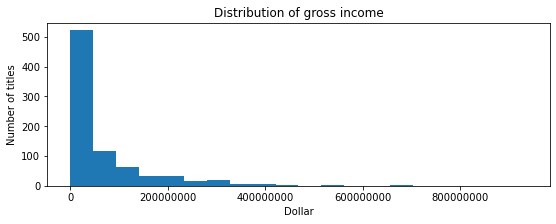

In [27]:
gro_plt = df_noNA_gross['gross'].plot(kind='hist', bins=20, title='Distribution of gross income')
gro_plt.ticklabel_format(useOffset=False, style='plain')
gro_plt.set_ylabel('Number of titles')
gro_plt.set_xlabel('Dollar')
plt.rcParams["figure.figsize"] = (10,3)
plt.show()

In [38]:
#Lets look at a subset of our data consisting of the highest grossing titles (75% Quartil). 
df_highst_gross = df_noNA_gross.query('gross > 80_000_000').reset_index(drop=True)
df_highst_gross = df_highst_gross.sort_values(by=['gross'], ascending = False)
print("Top 10 highest gross income movies:\n")
df_highst_gross.head(10)

Top 10 highest gross income movies:



,name,release_y,certificate,run_time,genre,imdb_rat,meta_sco,director,star_1,star_2,star_3,star_4,num_votes,gross,genre_1,genre_2,genre_3
106,Star Wars: Episode VII - The Force Awakens,2015,U,138,"Action, Adventure, Sci-Fi",7.9,80.0,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823,936662225,Action,Adventure,Sci-Fi
25,Avengers: Endgame,2019,UA,181,"Action, Adventure, Drama",8.4,78.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Evans,Mark Ruffalo,809955,858373000,Action,Adventure,Drama
134,Avatar,2009,UA,162,"Action, Adventure, Fantasy",7.8,83.0,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,1118998,760507625,Action,Adventure,Fantasy
26,Avengers: Infinity War,2018,UA,149,"Action, Adventure, Sci-Fi",8.4,68.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,834477,678815482,Action,Adventure,Sci-Fi
142,Titanic,1997,UA,194,"Drama, Romance",7.8,75.0,James Cameron,Leonardo DiCaprio,Kate Winslet,Billy Zane,Kathy Bates,1046089,659325379,Drama,Romance,None
84,The Avengers,2012,UA,143,"Action, Adventure, Sci-Fi",8.0,69.0,Joss Whedon,Robert Downey Jr.,Chris Evans,Scarlett Johansson,Jeremy Renner,1260806,623279547,Action,Adventure,Sci-Fi
184,Incredibles 2,2018,UA,118,"Animation, Action, Adventure",7.6,80.0,Brad Bird,Craig T. Nelson,Holly Hunter,Sarah Vowell,Huck Milner,250057,608581744,Animation,Action,Adventure
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444,Action,Crime,Drama
120,Rogue One,2016,UA,133,"Action, Adventure, Sci-Fi",7.8,65.0,Gareth Edwards,Felicity Jones,Diego Luna,Alan Tudyk,Donnie Yen,556608,532177324,Action,Adventure,Sci-Fi
29,The Dark Knight Rises,2012,UA,164,"Action, Adventure",8.4,78.0,Christopher Nolan,Christian Bale,Tom Hardy,Anne Hathaway,Gary Oldman,1516346,448139099,Action,Adventure,None
